# Project Proposal

# Introduction:

Tennis is a popular sport among men and women all over the world. Therefore, the analysis of factors affecting performance and success is of great interest. Since tennis players' earnings can vary widely and "Prize Money” could reflect a player's earnings in tennis tournaments, understanding the determinants of prize money can provide insights into the financial success of professional tennis players. One main factor is ranking points. In professional tennis, players compete in various tournaments, accumulate ranking points, and move up or down in the rankings based on their performance. This system is used to determine tournament entries and player recognition. In our model, our research question is "Do rankings points affect the amount of prize money a tennis player receives? " To answer the question, we will be using the data `player_stats(1).csv` from Ultimate Tennis Statistics. This data set contains the statistics of the top 500 tennis players in the world.

Cited Source: https://olympics.com/en/news/tennis-rankings-atp-wta-men-women-doubles-singles-system-grand-slam-olympics

# Preliminary exploratory data analysis:

In [2]:
# Run to load packages
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
# run to load data set
player_data <- read_csv("https://raw.githubusercontent.com/dcai01/dsci100_project/main/project_proposal/data/player_stats%20(1).csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Run to view tidied/wrangled data
player_data$"Prize Money" <- gsub("[^0-9.-]", "", player_data$"Prize Money")

player_data_renamed <- player_data |>
    separate(Age, into = c("age", "birthday"), sep ="\\(") |>
    separate("Best Rank", into = c("best_rank", "date"), sep ="\\(") |>
    separate("Current Rank", into = c("current_rank", "points"), sep ="\\(") |>
    separate("Prize Money", into = c("prize_money", "dash"), sep = "-")|>
    rename(plays = Plays, backhand = Backhand, name = Name)|>
    select(name, age, plays, current_rank, best_rank, backhand, prize_money) |>
    drop_na()

player_data_renamed$plays_dummy <- ifelse(player_data_renamed$plays == "Right-handed", 1, 0) #1 means "Right-handed" and 0 means "Left-handed	
player_data_renamed$backhand_dummy <- ifelse(player_data_renamed$backhand == "One-handed", 1, 0) #1 means "One-handed	" and 0 means "Two-handed"

player_data_renamed <- player_data_renamed |>
                       mutate(age = as.numeric(age),
                              current_rank = as.numeric(current_rank),
                              best_rank = as.numeric(best_rank),
                              prize_money = as.numeric(prize_money))

player_data_renamed

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 399 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”


name,age,plays,current_rank,best_rank,backhand,prize_money,plays_dummy,backhand_dummy
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Jack Draper,18,Left-handed,326,316,Two-handed,59040,0,0
Lukas Lacko,32,Right-handed,178,44,Two-handed,3261567,1,0
Duck Hee Lee,21,Right-handed,236,130,Two-handed,374093,1,0
Bernard Tomic,27,Right-handed,183,17,Two-handed,6091971,1,0
Hubert Hurkacz,22,Right-handed,31,31,Two-handed,1517157,1,0
Sekou Bangoura,28,Right-handed,307,213,Two-handed,278709,1,0
Tung Lin Wu,21,Right-handed,232,229,Two-handed,59123,1,0
Sanjar Fayziev,25,Right-handed,417,253,Two-handed,122734,1,0
Emil Ruusuvuori,20,Right-handed,104,104,Two-handed,74927,1,0


In [5]:
# Run to split data into training and testing set
player_split <- initial_split(player_data_renamed, prop = 0.75, strata = prize_money)
player_train <- training(player_split)
player_test <- testing(player_split)

In [6]:
# Run to calculate mean, max and min of each variable
player_summarize_mean <- player_train |>
                        select(age, current_rank, best_rank, prize_money, plays_dummy, backhand_dummy) |>
                        map_dfr(mean, na.rm = TRUE) |>
                        round(1) |>
                         pivot_longer(
                          cols = age:backhand_dummy,
                          names_to = "Variable",
                          values_to = "Mean")

                        
player_summarize_max <- player_train |>
                        select(age, current_rank, best_rank, prize_money, plays_dummy, backhand_dummy) |>
                        map_dfr(max, na.rm = TRUE)|>
                        pivot_longer(
                        cols = age:backhand_dummy,
                        names_to = "Variable",
                        values_to = "Max")

player_summarize_min <- player_train |>
                        select(age, current_rank, best_rank, prize_money, plays_dummy, backhand_dummy) |>
                        map_dfr(min, na.rm = TRUE)|>
                        pivot_longer(
                        cols = age:backhand_dummy,
                        names_to = "Variable",
                        values_to = "Max")

player_summarize_data = merge(player_summarize_mean, player_summarize_max,  by = "Variable")


player_summarize_data

Variable,Mean,Max
<chr>,<dbl>,<dbl>
age,26.5,40
backhand_dummy,0.1,1
best_rank,144.9,485
current_rank,226.1,500
plays_dummy,0.9,1
prize_money,82944047.5,2746601610


Warning message:
“Removed 75 rows containing missing values (`geom_point()`).”


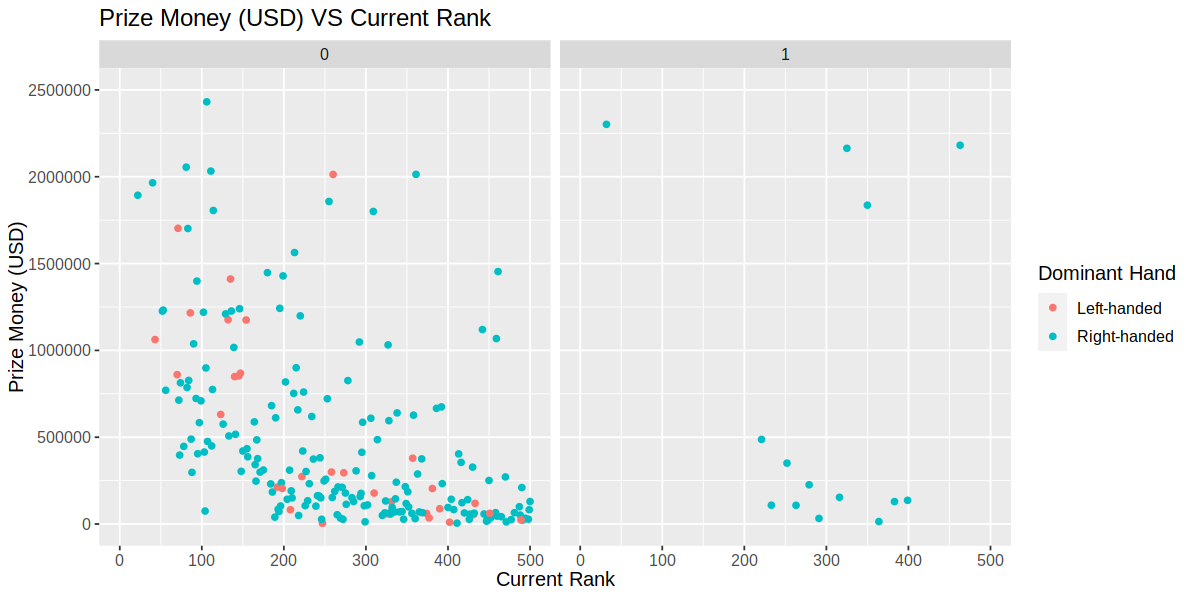

In [7]:
# Run to see plot comparing prize money and current rank
options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_current <- ggplot(player_train, aes(x = current_rank, y = prize_money, color = plays)) +
  geom_point() +
  xlab("Current Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  facet_grid(cols = vars(backhand_dummy)) +
  ggtitle("Prize Money (USD) VS Current Rank")

small_plot_current

Warning message:
“Removed 75 rows containing missing values (`geom_point()`).”


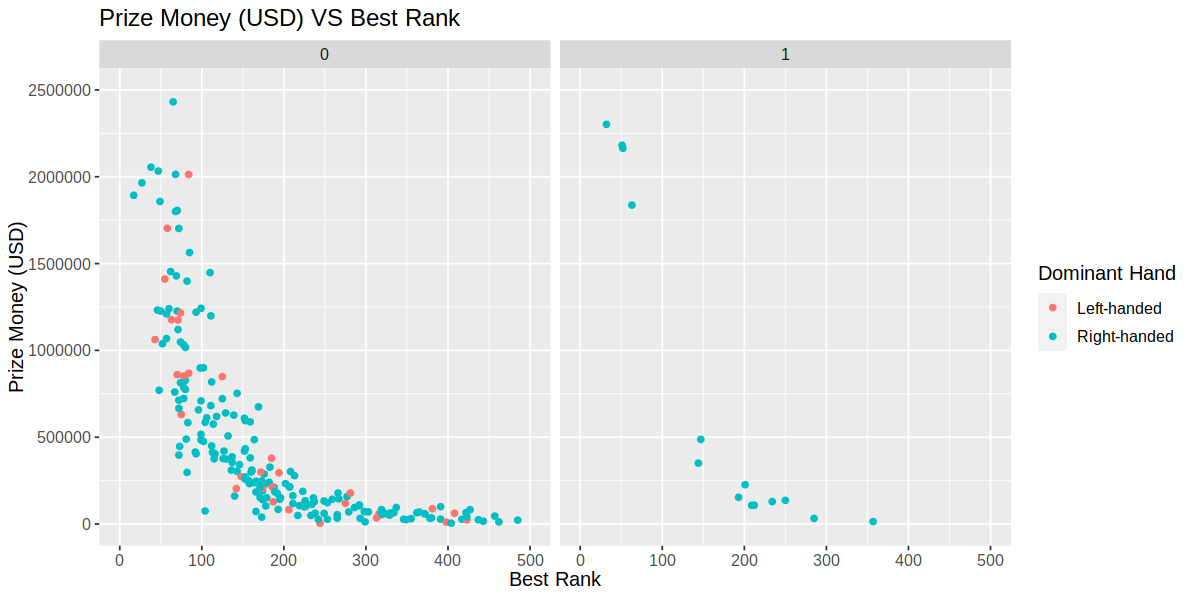

In [8]:
# Run to see plot comparing prize money and best rank
options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_best <- ggplot(player_train, aes(x = best_rank, y = prize_money, color = plays)) +
  geom_point() +
  xlab("Best Rank") +
  xlim(0, 500) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  facet_grid(cols = vars(backhand_dummy)) +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Best Rank")

small_plot_best

Warning message:
“Removed 75 rows containing missing values (`geom_point()`).”


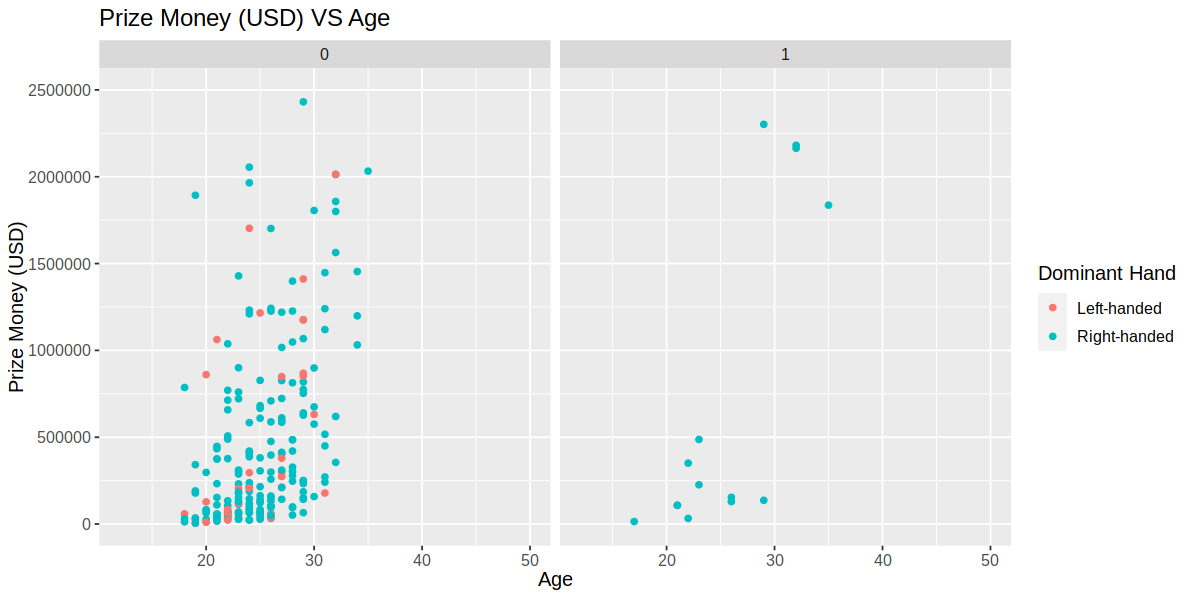

In [9]:
options(repr.plot.width = 10, repr.plot.height = 5) 
small_plot_age <- ggplot(player_train, aes(x = age, y = prize_money, color = plays)) +
  geom_point() +
  xlab("Age") +
  xlim(12, 50) +
  ylim(0, 2500000) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  facet_grid(cols = vars(backhand_dummy)) +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Age")


small_plot_age

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 75 rows containing non-finite values (`stat_boxplot()`).”


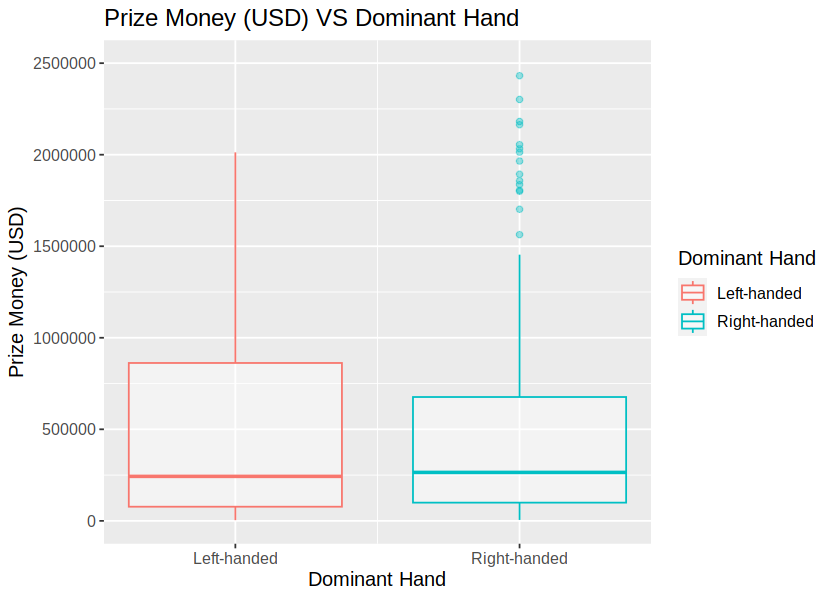

In [10]:
options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_hand <- ggplot(player_train, aes(x = plays_dummy, y = prize_money, color = plays)) +
  geom_boxplot(alpha=0.4) +
  xlab("Dominant Hand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Left-handed", "Right-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Dominant Hand")

small_plot_hand

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 75 rows containing non-finite values (`stat_boxplot()`).”


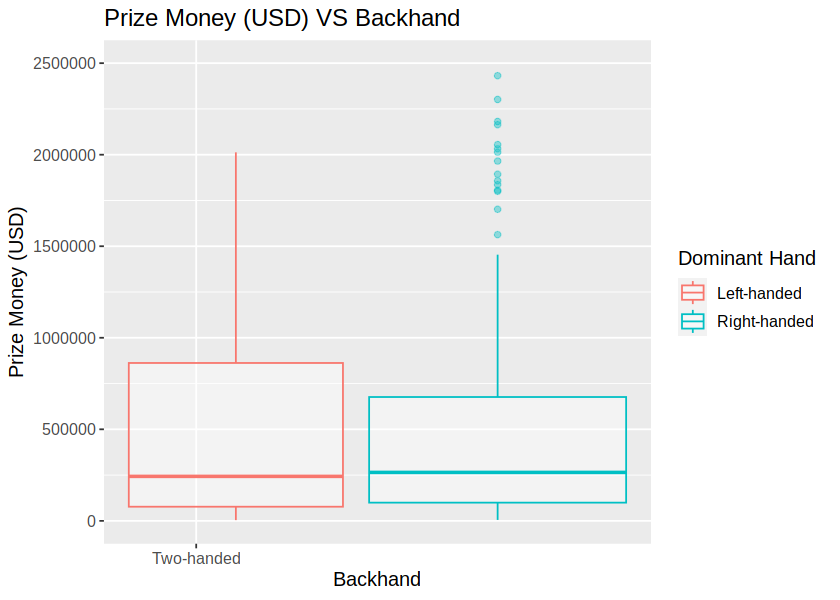

In [13]:
options(repr.plot.width = 7, repr.plot.height = 5) 
small_plot_backhand <- ggplot(player_train, aes(x = backhand_dummy, y = prize_money, color = plays)) +
  geom_boxplot(alpha=0.4) +
  xlab("Backhand") +
  xlim(0,1) +
  ylim(0, 2500000) +
  scale_x_continuous(breaks = c(0, 1), labels = c("Two-handed", "One-handed")) +
  ylab("Prize Money (USD)") +
  labs(color = "Dominant Hand") +
  theme(text = element_text(size = 12)) +
  ggtitle("Prize Money (USD) VS Backhand")

small_plot_backhand

# Methods:

We will use a regression model to predict the expected prize money for a tennis athlete by using multiple variables to answer our research question.

Our dependent variable is a player's earnings in tennis tournaments which is represented by "Prize Money" in our model (Unit: US dollar). Our main independent variables are best ranking points and current ranking points. Best ranking points in tennis represents a player's historical success, indicating the highest rank they've achieved, while current ranking points reveals their current standing. Analyzing both factors is crucial as historical success can impact a player's reputation, endorsements, and invitations to prestigious tournaments, whereas current performance influences tournament entries and possible prize. Best ranking points also provides insights into a player's career trajectory, showing if they've faced challenges or are on an upward trajectory. Moreover, higher current ranking points grants players entry to more tournaments, impacting earning prize. Other important control variables include age, plays hand, and the use of backhand. We chose these control variables because they all may lead to changes in the dependent variable. Age is also important since younger players may have more energy and stamina, potentially providing them with a competitive advantage. On the other hand, older players may have the experience and strategic depth, but their physical condition may decline. Dominant hand and the choice of backhand style can impact a player's style and game strategy, which might be reflected in their prize earnings. We also transformed qualitative variables to its respective dummy variable. All of these variables provide different dimensions of a player's career and can help create a more accurate model.

We used a scatter plot to visualize the results, which depicts the relationship between independent variables with prize money as the dependent variable. By examining the scatter plot, we can gain valuable insights, such as if the points cluster in a specific pattern, it may suggest a correlation or relationship between independent variables and prize money. Additionally, the color-coded data points help us distinguish players with different dominant hands, potentially revealing variations in prize money earnings based on this characteristic.

# Expected outcomes and significance:

We expect to find that the higher best ranking and current ranking will lead to a higher prize money. Since the ranking determines the level of tournament that a tennis player competes in, we can assume that the higher the tournament means the higher the rank and therefore, more prize money. 
We can use these findings to predict how much money a tennis player makes in prize money. If a new tennis player were to just start out their career, according to how their ranking is progressing we can see how much money this player is expected to make in the future. 
The question we may want to ask in the future is: Is there an interplay between the best rankings and the current rankings? Is there a correlation between them? If so, how do we determine which one has a greater impact on prize earning?